Задача 1
. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [1]:
import numpy as np
a = np.random.random((3,10));
print(a)

[[0.91658614 0.38143863 0.8236866  0.14432145 0.74924241 0.47903611
  0.23253519 0.80227904 0.00962756 0.47975688]
 [0.55469927 0.45127554 0.71292678 0.01281751 0.20841287 0.58457114
  0.42550593 0.46712918 0.13898236 0.29129212]
 [0.98069259 0.21224996 0.40166009 0.42951575 0.63517695 0.07939152
  0.92677567 0.5041093  0.08380377 0.65722858]]


In [2]:
b = a - 0.5;
b = np.absolute(b);
args = np.argmin(b, axis=1);
st=[0,1,2];
print(a[st,args])

[0.47975688 0.46712918 0.5041093 ]


Задача 2. Создайте двумерный массив 6x6, заполненный случайными значениями.
Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [12]:
a = 10*np.random.random((6, 6))
print(a)
print("\nAns:")
print (np.sum(a, axis = 1) / np.min(a, axis = 0))

[[5.97924882 9.40765213 1.59881428 1.91772038 1.10817443 2.46526075]
 [5.17595414 9.16246025 4.67757588 6.59928826 2.08045621 7.54566587]
 [5.24320067 7.14419052 9.45878206 7.8910573  6.80183309 3.57117873]
 [7.26041707 6.85749673 1.6595558  5.36544013 2.69177887 3.72260558]
 [2.63587421 6.38461308 9.23021291 0.4122866  3.89501022 1.95007763]
 [1.1662     1.48060193 1.18239404 8.40751601 5.82467906 1.40491012]]

Ans:
[19.27359869 23.80207657 33.92290647 66.84014076 22.11571937 13.85590498]


Задача 3. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [5]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(x)
print("\n Ans:")
print (np.max(x[1:][(x == 0)[:-1]]))

[6 2 0 3 0 0 5 7 0]

 Ans:
5


Задача 4. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). 
Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. 
В случае, если некоторый индекс встретился в массиве i несколько раз, 
прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [7]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print (x + np.bincount(i, minlength = len(x)))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


Задача 5. Написать функцию, реализующую алгоритм k-means. 
Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html.
Функция должна содержать не более двух циклов while (for).

In [315]:
from sklearn import preprocessing
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances_argmin

def k_means (data, k, iteration , thresh = 1e-05):
    std = np.std(data, axis = 0)
    norm_data = data/std
    n = len(data)
    dim = len(data[0])
    cluster = np.zeros((k, dim))
    cluster_belon = np.zeros((n,1), dtype = int)
    new_cluster = np.ones(cluster.shape)
    res_of_iteration_codebook = np.empty((iteration, n))
    res_of_iteration_dist = np.empty((iteration))
    for i in range(iteration):
        cluster = norm_data[np.random.choice(np.arange(norm_data.shape[0]),k,replace=False)]
        while (np.linalg.norm(np.max(new_cluster - cluster)) > thresh):
            cluster_belon = pairwise_distances_argmin(norm_data, cluster)
            for j in range(k):
                new_cluster[j] = norm_data[cluster_belon == j].mean(axis = 0)
            cluster = new_cluster
        dist = cdist(norm_data,cluster).min(axis = 1).sum()/k
        res_of_iteration_codebook[i] = cluster_belon
        res_of_iteration_dist[i] = dist
    dist = res_of_iteration_dist[np.argmin(res_of_iteration_dist)]
    codebook = res_of_iteration_codebook[np.argmin(res_of_iteration_dist)]
    return codebook, dist

Задача 6. С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

In [276]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
dists=np.empty(10)

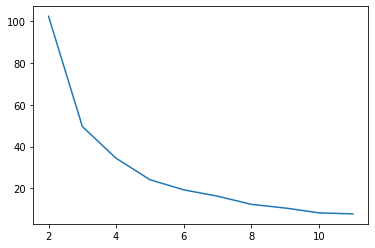

In [277]:
my_data = np.array([data[:, 2], data[:,3]]).T
for i in range(10):
    clust, dists[i] = k_means(my_data, i+2, 4)
plt.plot(np.arange(10)+2, dists)
plt.show()

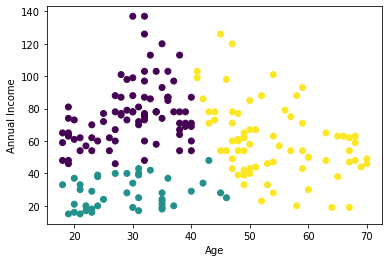

In [284]:
cluster, dist = k_means(my_data, 3, 2)
plt.scatter(my_data[:, 0], my_data[:, 1], c=cluster);
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

Мы видим, что доход в возрасте от 30 до 40 самый высокий

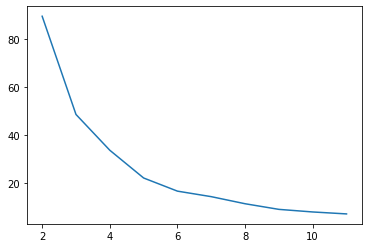

In [302]:
my_data = np.array([data[:, 2], data[:,4]]).T
for i in range(10):
    clust, dists[i] = k_means(my_data, i+2, 4)
plt.plot(np.arange(10)+2, dists)
plt.show()

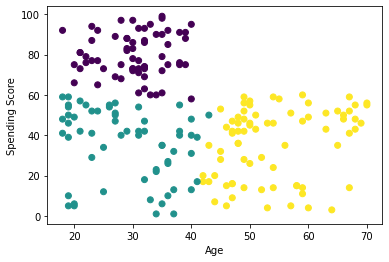

In [291]:
cluster, dist = k_means(my_data, 3, 2)
plt.scatter(my_data[:, 0], my_data[:, 1], c=cluster);
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

А тут можем сдлеать вывод о том, что в возрасте от 20 до 40 лет выделяется группа людей, у которых покупательский индекс самый высокий, но после 40 лет люди начинают экономить, меньше тратить

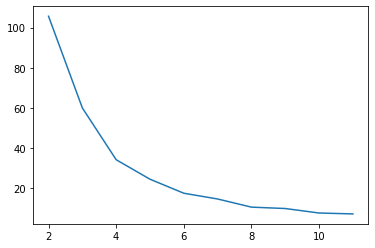

In [311]:
my_data = np.array([data[:, 3], data[:,4]]).T
for i in range(10):
    clust, dists[i] = k_means(my_data, i+2, 4)
plt.plot(np.arange(10)+2, dists)
plt.show()

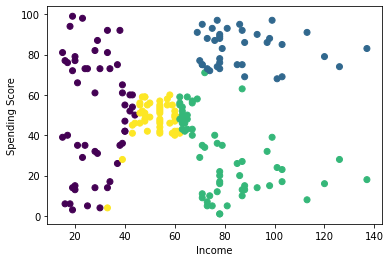

In [312]:
cluster, dist = k_means(my_data, 4, 2)
plt.scatter(my_data[:, 0], my_data[:, 1], c=cluster);
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

Видим, что у людей среднего класса очень размеренные траты, они не сильно экономят и не сильно шикуют...
А люди бедные и богатые могут как растрачиваться, так и экономить